<h1><center>Tutorial 10: Mixed states, Quantum Channels, and the Bloch Ball</center></h1>

Created by me as an optional advanced tutorial for PHYS 234 (Quantum Physics 1) at the University of Waterloo, Winter 2020. Originally in Mathematica, adapted to Jupyter Notebook. 

Following on the concepts of mixed states introduced in the lectures, this tutorial explains how to plot them on the Bloch ball. We will obtain such plots by using the following Python code. For the purpose of this tutorial, the following cells may be treated as boilerplate code, but you can study it on your own and modify it if you wish.

**Start of boilerplate code, run ALL the cells**

In [2]:
#We call the relevant libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [3]:
#This defines the arrow object, useful to plot later
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='r', shrinkA=0, shrinkB=0)

o = np.array([0,0,0])

In [7]:
#Some global variable definitions to parametrize the Bloch sphere, great circles, and axes
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

phii=np.linspace(0,2*pi,num=50)

xx=r*sin(phii)
yy=r*cos(phii)
zz=0
zz2=np.linspace(0,0,num=50)

axrang=np.linspace(-1,1,num=10)

x1=axrang
y1=np.linspace(0,0,num=10)
z1=0

X=np.matrix([[0,1],[1,0]])
Y=np.matrix([[0,-1j],[1j,0]])
Z=np.matrix([[1,0],[0,-1]])


In [8]:
#This plots an empty Bloch sphere, no quantum state in it
def plot_bloch(rho):
    
    fig = plt.figure(figsize=(12,12));

    ax = fig.add_subplot(111, projection='3d');
    ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='gray', alpha=0.1, linewidth=0);
    #ax._axis3don = False
    ax.view_init(elev=10, azim=40);
    ax.set_aspect('auto');

    ax.plot3D(
    xx, yy, zz,'--',color='gray');
    ax.plot3D(
    xx, zz2, yy,'--',color='gray');
    ax.plot3D(
    zz2, xx, yy,'--',color='gray');

    ax.plot3D(
    x1, y1, z1,color='black');
    ax.plot3D(
    y1, x1, z1,color='black');
    ax.plot3D(
    y1, y1, x1,color='black');

    ax.text(0, 0, 1.1, "|0>", color='black');
    ax.text(0, 0, -1.15, "|1>", color='black');
    ax.text(1.1, 0, -0.05, "x", color='black');
    ax.text(0, 1.05, -0.03, "y", color='black');
    ax.text(0, 0.03, 0.95, "z", color='black');

    rho=np.matrix(rho)

    a = Arrow3D([0, np.real(np.trace(rho.dot(X)))], [0,np.real(np.trace(rho.dot(Y)))], [0,np.real(np.trace(rho.dot(Z)))], **arrow_prop_dict)
    ax.add_artist(a)
    
    return


**End of boilerplate code**

<h2> 1. Mixed states on the Bloch Ball <h2>

Do we have a vector representation for mixed qubit states? As opposed to pure two-level states, these are not plotted on the Bloch sphere, but in the interior of the Bloch ball. Indeed, there is a one-to one correspondence between mixed qubits $\rho$ and vectors $\vec{a}$ such that  $|\vec{a}|\leq 1$. In the following, we will use the ordered basis $\left\{\left\lvert 0 \right\rangle, \left\lvert 1 \right\rangle\right\}$ for qubit states.

**(a)** Show that any two-dimensional density matrix $\rho$ can be expressed as 

$$ \rho=\frac{1}{2}\left(\mathbb{I}+\vec{a}.\vec{\sigma}\right) $$

where $\mathbb{I}$ is the identity matrix, $\vec{a}=(a_x,a_y,a_z)$ is a three-component real vector, and $\vec{\sigma}$ is the vector of Pauli matrices $\sigma=(\sigma_x,\sigma_y,\sigma_z)$. 


**(b)** Show that given a density matrix expanded as in **(a)**, we can recover the components of vector $\vec{a}$ via

$$a_{i}=\textrm{Tr}(\rho \sigma_i).$$

**(c)** Show that $|\vec{a}|=1$ for a pure state.

**(d)** The *plot_bloch* function defined above uses what we just discovered to plot mixed qubits on the Bloch ball. It takes only one argument, which is simply the density matrix in the form [[a,b],[c,d]]. For example, the density matrix associated with the pure state

$$\left\vert \psi\right\rangle = \frac{1}{\sqrt{2}}\left\lvert 0 \right\rangle + \frac{1}{\sqrt{2}} e^{i\pi/4}\left\lvert 1 \right\rangle  $$

is given by

$$\rho_\psi=\left( \begin{array}{cc} 1/2 & e^{-i\pi/4}/2\\ e^{i\pi/4}/2 & 1/2 \end{array}\right)$$. 

Therefore, we plot it by using

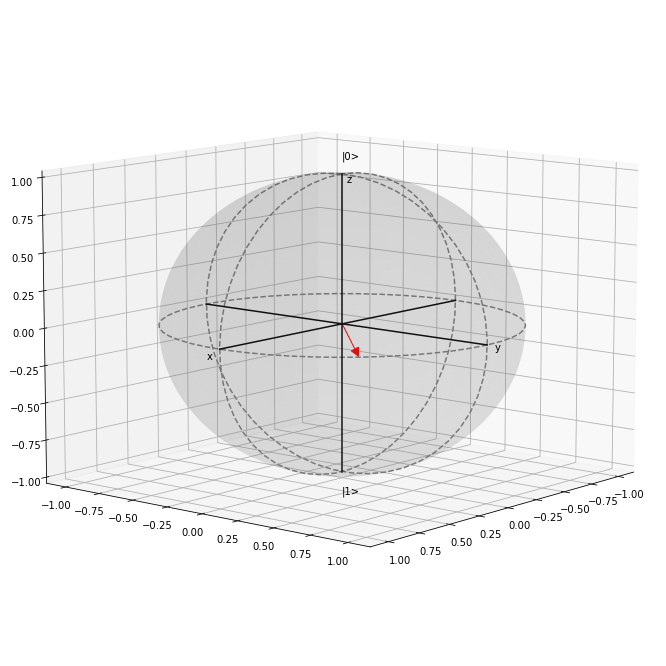

In [10]:
plot_bloch([[1/2,1/2*np.exp(-np.pi/4*1j)],[1/2*np.exp(np.pi/4*1j),1/2]])

as expected from our knowledge of pure qubits. Play around with different mixed states and plot them on the Bloch ball. Where is the maximally mixed state located on the Bloch ball?

**(e)**  Show that, in terms of the Bloch vector $\vec{a}$, the purity is given by $$ \textrm{Tr}(\rho^2) =\frac{1}{2}\left(1+|\vec{a}|^2\right).$$



**(f)** Recall that a unitary operator $U$ acts on a mixed state $\rho$ on the left and right: $\rho\rightarrow U\rho U^{\dagger}$, and that the purity of a mixed state $\rho$ is given by $\textrm{Tr}(\rho^2)$. Do you think that the action of a unitary operator on a density matrix can change its purity? Test your hypothesis using the *plot_bloch* function. For example, given the pure state $\rho=\left\lvert 0\right\rangle \left\langle 0 \right\rvert$, let us apply a rotation $R(\theta)$ by an angle $\theta$ around the $x$ axis. This is implemented as follows:

In [18]:
def R(ang):
    return np.matrix([[cos(ang/2), -1j*sin(ang/2)],[-1j*sin(ang/2),cos(ang/2)]])

Then we apply it to the pure state $\rho=\left\lvert 0\right\rangle \left\langle 0 \right\rvert$:

In [23]:
rho1=np.matrix([[1,0],[0,0]]);
out=np.matmul(np.matmul(R(0.2),rho1),R(0.2).H)

The .H attribute finds the complex transpose for numpy matrices

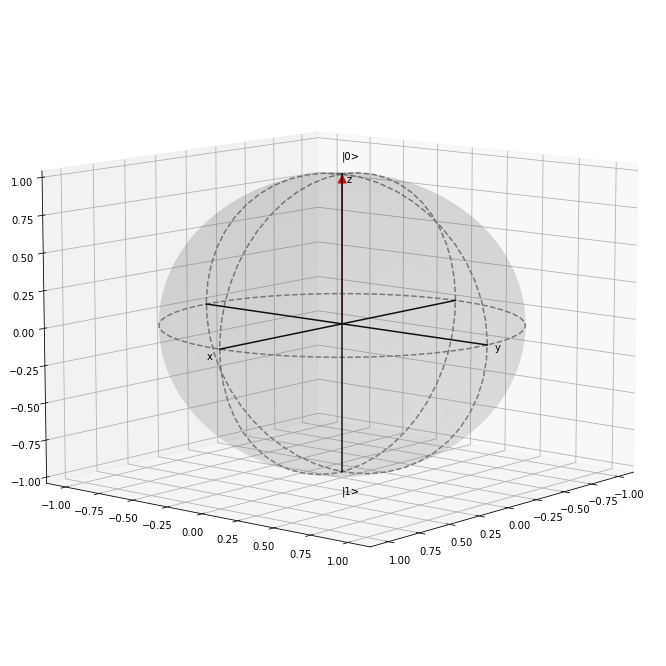

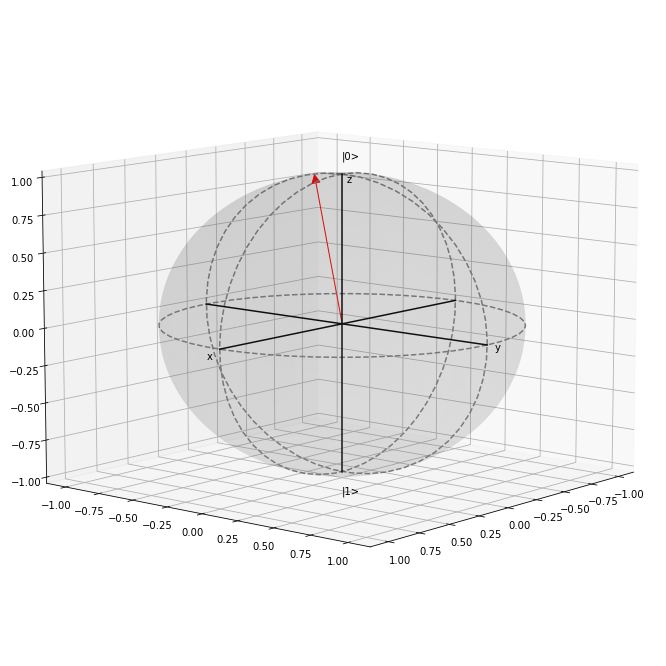

In [28]:
plot_bloch(rho1)
plot_bloch(out)

Since it is a rotation, it does not change the purity. Your task is to rewrite this code this for another choice of density matrix that does not come from a pure state and for some other unitaries of your choice. For example, some choices of unitaries that are not simple rotations are the Hadamard gate and the $\pi/8$ phase shift gate:

$$U_H= \frac{1}{\sqrt{2}}\left(\begin{array}{cc} 1 & 1\\ 1 & -1 \end{array}\right) \qquad U_{\pi/8}= \left( \begin{array}{cc} 1 & 0\\ 0 & e^{i\pi/4}\end{array}\right)$$

Feel free to use these or any other unitary operations of your choice.

**(g)** If you concluded that unitaries do not change the purity of a mixed state, give a mathematical proof of such claim. If your claim is that they can change the purity, give an example where they do.

<h2> 2. Quantum channels <h2>

Is there anything that we can do to a quantum state to change its purity? Since the operations we can apply on quantum states are actually executed by classical devices, instead of performing one operation, we could think of applying the unitary $U_0$ with probability $p$ and the unitary $U_1$ with probability $1-p$. You could also think of this as a noisy unitary. In this case, a mixed state $\rho$ would evolve according to the rule 

$$\rho\rightarrow U_0\rho U_0^{\dagger} + (1-p) U_1 \rho U_1^{\dagger}.$$

Here, $U_0$ and $U_1$ are known as the **Kraus Operators**. Of course, one could extend this to more unitaries as long as the probabilities add to 1. The question we want to answer is whether these generalized operations, also knows as **quantum channels**, can change the purity of $\rho$. 

**(a)** The **bit-flip channel** applies the $\sigma_x$ operator with probability $p$ and leaves the state alone with probability $1-p$. What are the Kraus operators in this case? Write a Python function of $\rho$ and $p$ that applies these Kraus operators, remember that $\sigma_x$ has already been defined for you in the variable $X$ on the boilerplate code. Then, choose a density matrix $\rho$ and plot the states before and after the transformation on the Bloch Ball. What happens to the length of the vector? Does the purity change? Are the states that remain the same? After experimenting, try to prove your claims mathematically (this can be a bit challenging).

**(b)** Repeat all the questions in **(a)** for the phase flip channel, which applies the operator $\sigma_z$ with probability $p$ and leaves the state alone with probability $1-p$. 

**(c)** As mentioned before, we can apply more than two Kraus operators. Show that applying each of the $\sigma_i$ with probability $p/4$ and doing nothing with probability $1-\frac{3p}{4}$ is equivalent to transforming the state $\rho$ into the completely mixed state with probability $p$ and leaving it alone with probability $1-p$. Write the Kraus operators and a Python function of $\rho$ and $p$ that implements this transformation on a density matrix $\rho$. This is called the **depolarizing channel**. Optionally, show that if $\rho$ has Bloch vector $\vec{a}$ before the transformation, then the Bloch vector after applying the channel is $(1-p)\vec{a}$. Thus, conclude that this quantum opertation reduces the purity of all non-maximally mixed states.